# 演習1-3

## パターン識別編（その2）

わからない場合や方針が立たない場合は PracticeHint にある同名のファイルを眺めてみてください．

In [1]:
import numpy as np
import matplotlib.pylab as plt

それでは，次に２次元データの識別を考えてみよう

In [2]:
# [-1, 1] x [-1, 1] で定義された２次元空間に点を N 点ばらまき
# 適当な直線の上下で暮らすを分割してデータを作る

N = 4000 # 点の個数
true_w１ = np.array([1, np.random.rand()]) #適当に傾き決める． わからなければ適当に数値を当て込んでもOK
true_w0 = 0.0 # 面倒なので 0 に設定しておく

# 点をばらまく
x = np.random.uniform(low=-1, high=1, size=(N, 2))

# ラベルの設定，直線  true_w1[0] * x[1] + true_w1[1] * x[0] + true_w0 = 0 より大きければクラス1
# そうでなければ クラス 0 のラベルを貼り付ける
y = np.zeros(N)
y[x @ true_w1 + true_w0 > 0] = 1

### これで下準備完了
(x, y) にデータが入っている．これのプロットと真の直線の関係を見てみる

(-1.0, 1.0)

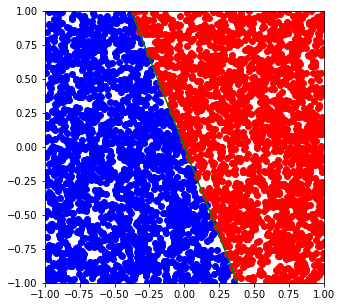

In [3]:
plt.figure(figsize=(5,5))
plt.plot(x[y==0, 0], x[y==0, 1], 'bo')
plt.plot(x[y==1, 0], x[y==1, 1], 'ro' )

xx = np.linspace(-1, 1, 128)
yy = -true_w1[0]/true_w1[1] * xx - true_w0 / true_w1[1]
plt.plot(xx, yy, 'g-')
plt.xlim(-1, 1)
plt.ylim(-1,1)

## 問い: 赤点と青点の境界を決めてクラスを判別することは可能か？

２次元のデータ上でクラス境界を求めます．
データの点群を $\{x_n\}$ とすると， 0 のラベルが付いたクラスと 1 のラベルのついたクラスが，上図のように散らばっているので
ロジスティック関数を適当にパラメータを変えつつ貼り付けてフィッティングする方針は変わりません

前述の例との違いは $x$ が２変数からなるので， $f(x; w) = \sigma( w_1 x + w_0)$ の $w_1$ がベクトルになり $w_1 x$ の演算が内積になることのみ
ロス関数も交差エントロピー関数で
$$
    J(w) = - \sum_n y_n \log f(x_n, w) + (1-y_n) \log (1-f(x_n, w))
$$
を使う．あとは

## モデル $f(x_n; w)$ のロスが小さくなるように $w$ を求める．

## Keras + TensorFlow を用いて答えなさい

In [4]:
# いつものインポート
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# 以下にコードを書いていくこと
model = Sequential()
model.add(Dense(1, input_shape=(2,), use_bias=True)) 
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

2022-01-26 16:30:02.044178: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


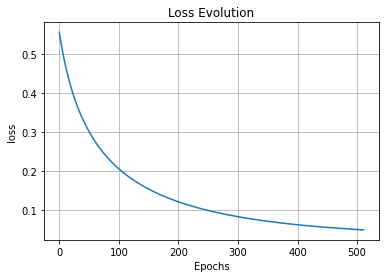

In [5]:
# ロスの値が学習によってどう変わるかを表示すること
hist=model.fit(x,y,epochs=512,batch_size=100,verbose=0)
plt.plot(hist.history['loss'])
plt.title('Loss Evolution')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.grid()

In [6]:
# 結合とバイアスを取り出し，表示してみること．
w1, w0 = model.get_weights()
w0 = float(w0)
print("w1,w0 = (%.3f,%.3f)"%(w1[1]/w1[0],w0))

w1,w0 = (0.366,0.007)


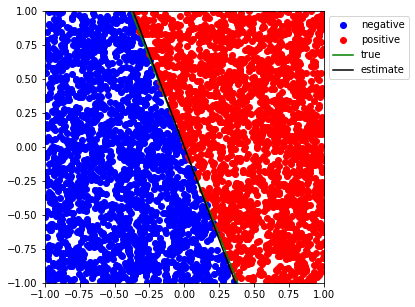

In [7]:
# 推定直線とデータ，真の直線を重ねてみること
plt.figure(figsize=(5,5))
plt.plot(x[y==0, 0], x[y==0, 1], 'bo', label='negative')
plt.plot(x[y==1, 0], x[y==1, 1], 'ro', label='positive' )

xx = np.linspace(-1, 1, 128)
yy = -true_w1[0]/true_w1[1] * xx - true_w0 / true_w1[1]
plt.plot(xx, yy, 'g-', label='true')

yy = - w1[0]/w1[1] * xx - w0 / w1[1]
plt.plot(xx, yy, 'k-', label='estimate')

plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

## 考察

演習の回答と照らして工夫したところがあれば，箇条書きで良いので以下にアピールしてください． 
例: パラメータを初期値から変えてみた，epoch数を増やしてみたなど
epoch数=512で平均10度くらいの開き、
epoch数=1024で平均5度くらいの開き、
epoch数=4096で平均3度くらいの開き、
epoch数=8192で大体見本となる直線と同じ傾きになった。
次に、epoch数を512に戻して、点の個数を変えた。
1000で平均3度くらいの開き、
2000で大体見本となる直線と同じ傾きになった。
4000でも同様だった。
epoch数=8192の時と比較すると、約半分の値で改善することができた。
以上より、直線による2次元の分類問題では、epoch数よりも学習用データ数の方が重要なのだと考えられる。それに、学習用データ数が少ないと、学習用データに最適化されたモデルができてしまい、学習しすぎになってしまう可能性があると考えられる。作成したモデルを学習用データに対してのみに用いるのであれば問題ないが、通常そのようなことはないので、機械学習全般においてepoch数よりも学習用データ数の方が重要なのだと考えられる。